# Latent Space Traversal Analysis

Hyperbolic latent spaces are better suited to capture hierarchical and complex semantic relationships between words, producing intermediate terms with greater generalization ability and diversity.

In contrast, intermediate concepts in Euclidean latent spaces are relatively constrained, primarily focusing on the words themselves and their immediate neighborhoods, and thus lacking deeper semantic hierarchies.

This demonstrates the advantage of hyperbolic spaces in natural language processing, particularly when hierarchical semantic representation and semantic transfer are involved.

## Introduction: Latent Space Traversal Analysis
Perform latent space traversal experiments to investigate the structure and semantic organization of the embedding space. Specifically, we explore the paths connecting the embeddings of a selected pair of entities—dotproduct and matrix_multiplication—through both Euclidean (linear) and hyperbolic (geodesic) interpolation. The interpolation is conducted by sampling 10 evenly spaced points between the two endpoints, allowing us to observe how the semantic neighborhood evolves throughout the path.

The rationale for selecting the pair (dotproduct, matrix_multiplication) is grounded in their mathematical proximity: both are central to linear algebra, and intermediate concepts such as matrix-vector_multiplication, replicatecol, or dot_product are expected to lie semantically between them. Therefore, a well-structured latent space should populate the intermediate regions with relevant and generalizable entities.

From the traversal paths, we observe that both the Euclidean and hyperbolic spaces successfully capture intermediate concepts at early and midpoints, including replicatecol, matrix_map, matrix-vector_multiplication, and dot_product. These are semantically aligned with the seed entities and indicate that the space is hierarchically and semantically organized.

A comparison of midpoint behaviors (t ≈ 0.5) reveals more generalization in the hyperbolic space, where entities like unit_matrix, symmetric_matrix, and addmonoidhom emerge. These are not only relevant to both endpoints but also serve as abstract generalizations that unify dot products and matrix operations. In contrast, the Euclidean space favors more direct interpolation with consistently recurring entities like matrix-vector_multiplication, dot_product, and fromblocks, suggesting a more linear blending of seed concepts rather than abstraction.

This divergence highlights a key distinction: hyperbolic interpolation encourages semantic abstraction, making it more suitable for hierarchical knowledge representation, while Euclidean interpolation preserves semantic continuity, offering clearer paths for symbolic or stepwise reasoning. The consistent appearance of core entities across both models reinforces the latent space's robustness, while the difference in generalization at the midpoint underscores the complementary nature of Euclidean and hyperbolic geometries in capturing different aspects of concept relationships.

## 1. MuRP and MuRE
### 1.1 Hyperbolic Space

In [1]:
!python Latent_Space_Traversal.py --model_path  poincare_model.pth --dataset my_dataset_latent_space --model poincare --visualize

Running Latent Space Traversal experiments with poincare model
Model device: cpu
Number of interpolation points: 10
Top-k nearest entities: 10

Category: Properties

=== Latent Space Traversal: absolute_value -> non-negativity ===
Using hyperbolic (geodesic) interpolation

Point 1 (t=0.00):
  Nearest entities: ['absolute_value', 'absolutevalue', 'linearmap.range', 'kernel_of_a_linear_map', 'linearmap.rank', 'vector-matrix_product', 'star', 'conjugation_by_a_unit_matrix', 'negation_of_a_matrix', "blockdiagonal'"]

Point 2 (t=0.11):
  Nearest entities: ['absolute_value', 'absolutevalue', 'linearmap.range', 'kernel_of_a_linear_map', 'conjugation_by_a_unit_matrix', 'linearmap.rank', 'vector-matrix_product', 'star', 'matrix_power', 'negation_of_a_matrix']

Point 3 (t=0.22):
  Nearest entities: ['absolute_value', 'absolutevalue', 'kernel_of_a_linear_map', 'linearmap.range', 'conjugation_by_a_unit_matrix', 'matrix_power', 'linearmap.rank', 'vector-matrix_product', 'star', 'determinant']

Poin

### 1.2 Euclidean

In [2]:
!python Latent_Space_Traversal.py --model_path euclidean_model.pth --dataset my_dataset_latent_space --model euclidean --visualize

Running Latent Space Traversal experiments with euclidean model
Model device: cpu
Number of interpolation points: 10
Top-k nearest entities: 10

Category: Properties

=== Latent Space Traversal: absolute_value -> non-negativity ===
Using Euclidean (linear) interpolation

Point 1 (t=0.00):
  Nearest entities: ['absolute_value', 'absolutevalue', 'linearmap.rank', 'mulzerooneclass', 'vector-matrix_product', 'star', 'linearmap.range', 'kernel_of_a_linear_map', 'negation_of_a_matrix', "blockdiagonal'"]

Point 2 (t=0.11):
  Nearest entities: ['absolute_value', 'linearmap.rank', 'absolutevalue', 'mulzerooneclass', 'linearmap.range', 'matrix_power', 'vector-matrix_product', 'kernel_of_a_linear_map', 'star', 'negation_of_a_matrix']

Point 3 (t=0.22):
  Nearest entities: ['absolute_value', 'mulzerooneclass', 'linearmap.rank', 'absolutevalue', 'matrix_power', 'linearmap.range', 'kernel_of_a_linear_map', 'conjugation_by_a_unit_matrix', 'vector-matrix_product', 'negation_of_a_matrix']

Point 4 (t=0

### 1.3 Analysis and Visualisation Demo

In [124]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

hyperbolic_path = [
   ['vector', 'orthogonal_columns', 'transpose', 'mulzerooneclass', 'linearmap.rank', 'diagonal', 'conjugation_by_a_unit_matrix', 'star_operation', 'scalar_multiplication', 'linearmap.single'],
   ['vector', 'orthogonal_columns', 'mulzerooneclass', 'transpose', 'linearmap.rank', 'diagonal', 'star_operation', 'conjugation_by_a_unit_matrix', 'linearmap.single', 'scalar_multiplication'],
   ['vector', 'orthogonal_columns', 'mulzerooneclass', 'transpose', 'diagonal', 'matrix', 'linearmap.rank', 'star_operation', 'linearmap.single', 'function'],
   ['vector', 'matrix', 'orthogonal_columns', 'mulzerooneclass', 'transpose', 'diagonal', 'addmonoidhom', 'function', 'linearmap.rank', 'star_operation'],
   ['vector', 'matrix', 'orthogonal_columns', 'mulzerooneclass', 'addmonoidhom', 'nonunitalcommsemiring', 'function', 'diagonal', 'addcommsemigroup', 'transpose'],
   ['matrix', 'vector', 'nonunitalcommsemiring', 'addcommsemigroup', 'addmonoidhom', 'addzeroclass', 'subtractionmonoid', 'function', 'mulzerooneclass', 'orthogonal_columns'],
   ['matrix', 'vector', 'addcommsemigroup', 'nonunitalcommsemiring', 'addzeroclass', 'addmonoidhom', 'subtractionmonoid', 'function', 'smulzeroclass', 'mulzerooneclass'],
   ['matrix', 'addcommsemigroup', 'addzeroclass', 'nonunitalcommsemiring', 'vector', 'addmonoidhom', 'subtractionmonoid', 'smulzeroclass', 'matrix_operation', 'function'],
   ['matrix', 'addcommsemigroup', 'addzeroclass', 'nonunitalcommsemiring', 'matrix_operation', 'addmonoidhom', 'subtractionmonoid', 'smulzeroclass', 'vector', 'function'],
   ['matrix', 'addcommsemigroup', 'addzeroclass', 'nonunitalcommsemiring', 'matrix_operation', 'addmonoidhom', 'smulzeroclass', 'subtractionmonoid', 'function', 'permutation']
]


euclidean_path = [
   ['vector', 'orthogonal_columns', 'diagonal', 'mulzerooneclass', 'linearmap.rank', 'transpose', 'star_operation', 'conjugation_by_a_unit_matrix', 'matrix_power', 'scalar_multiplication'],
   ['vector', 'orthogonal_columns', 'mulzerooneclass', 'diagonal', 'linearmap.rank', 'transpose', 'star_operation', 'conjugation_by_a_unit_matrix', 'matrix_power', 'scalar_multiplication'],
   ['vector', 'orthogonal_columns', 'mulzerooneclass', 'linearmap.rank', 'diagonal', 'star_operation', 'transpose', 'conjugation_by_a_unit_matrix', 'matrix_power', 'scalar_multiplication'],
   ['vector', 'orthogonal_columns', 'matrix', 'mulzerooneclass', 'linearmap.rank', 'star_operation', 'diagonal', 'conjugation_by_a_unit_matrix', 'scalar_multiplication', 'matrix_power'],
   ['vector', 'matrix', 'mulzerooneclass', 'orthogonal_columns', 'linearmap.rank', 'star_operation', 'nonunitalcommsemiring', 'scalar_multiplication', 'addcommsemigroup', 'conjugation_by_a_unit_matrix'],
   ['matrix', 'vector', 'mulzerooneclass', 'nonunitalcommsemiring', 'addcommsemigroup', 'orthogonal_columns', 'linearmap.rank', 'star_operation', 'scalar_multiplication', 'function'],
   ['matrix', 'vector', 'addcommsemigroup', 'nonunitalcommsemiring', 'mulzerooneclass', 'addzeroclass', 'linearmap.rank', 'star_operation', 'function', 'scalar_multiplication'],
   ['matrix', 'vector', 'addcommsemigroup', 'nonunitalcommsemiring', 'addzeroclass', 'mulzerooneclass', 'star_operation', 'function', 'linearmap.rank', 'matrix_operation'],
   ['matrix', 'addcommsemigroup', 'nonunitalcommsemiring', 'addzeroclass', 'matrix_operation', 'vector', 'mulzerooneclass', 'function', 'smulzeroclass', 'star_operation'],
   ['matrix', 'addcommsemigroup', 'matrix_operation', 'nonunitalcommsemiring', 'addzeroclass', 'mulzerooneclass', 'smulzeroclass', 'function', 'addmonoidhom', 'vector']
]

t_points = np.linspace(0, 1, 10)  # [0.0, 0.11, 0.22, ..., 1.0]

In [ ]:
def jaccard_similarity(set1, set2):
    """Calculate Jaccard similarity between two sets"""
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union > 0 else 0

# Calculate continuous similarity for Euclidean path
euclidean_sim = []
for i in range(1, len(euclidean_path)):
    sim = jaccard_similarity(
        set(euclidean_path[i-1]), 
        set(euclidean_path[i])
    )
    euclidean_sim.append(sim)

# Calculate continuous similarity for hyperbolic path
hyperbolic_sim = []
for i in range(1, len(hyperbolic_path)):
    sim = jaccard_similarity(
        set(hyperbolic_path[i-1]), 
        set(hyperbolic_path[i])
    )
    hyperbolic_sim.append(sim)

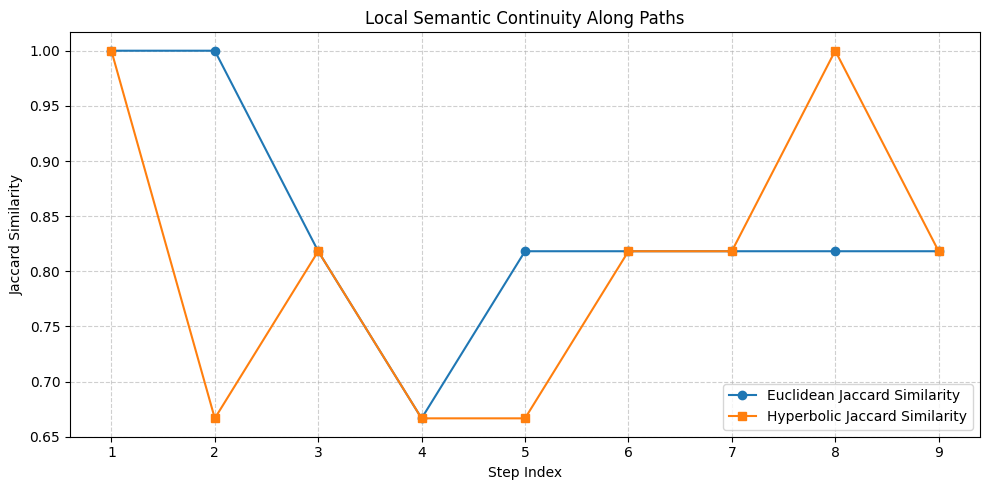


=== Euclidean Path Analysis ===
Average local similarity: 0.842
Midpoint vs Start: 0.429
Midpoint vs End:   0.429
Start vs End:      0.111

=== Hyperbolic Path Analysis ===
Average local similarity: 0.808
Midpoint vs Start: 0.176
Midpoint vs End:   0.538
Start vs End:      0.000
Generalization Score (1 - max(mid_start, mid_end)): 0.462


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def jaccard_similarity(set1, set2):
    """Calculate Jaccard similarity between two sets"""
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union > 0 else 0

def compute_path_similarities(path):
    """Calculate Jaccard similarity between consecutive points in a path"""
    return [
        jaccard_similarity(set(path[i - 1]), set(path[i]))
        for i in range(1, len(path))
    ]

def midpoint_generalization(path):
    """Calculate Jaccard similarity between midpoint and endpoints"""
    midpoint = set(path[len(path)//2])
    start = set(path[0])
    end = set(path[-1])
    sim_start = jaccard_similarity(midpoint, start)
    sim_end = jaccard_similarity(midpoint, end)
    return sim_start, sim_end, jaccard_similarity(start, end)

def generalization_score(mid_sim_start, mid_sim_end):
    """Define generalization metric"""
    return 1 - max(mid_sim_start, mid_sim_end)

# -------------------------------
# Analysis and Visualization
# -------------------------------

# Euclidean path analysis
euclidean_sim = compute_path_similarities(euclidean_path)
euc_mid_sim_start, euc_mid_sim_end, euc_start_end = midpoint_generalization(euclidean_path)

# Hyperbolic path analysis
hyperbolic_sim = compute_path_similarities(hyperbolic_path)
hyp_mid_sim_start, hyp_mid_sim_end, hyp_start_end = midpoint_generalization(hyperbolic_path)
hyp_gen_score = generalization_score(hyp_mid_sim_start, hyp_mid_sim_end)

# Visualize similarity curves (mainly applicable to Euclidean paths)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), euclidean_sim, label='Euclidean Jaccard Similarity', marker='o')
plt.plot(range(1, 10), hyperbolic_sim, label='Hyperbolic Jaccard Similarity', marker='s')
plt.xlabel('Step Index')
plt.ylabel('Jaccard Similarity')
plt.title('Local Semantic Continuity Along Paths')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Output Analysis Results
# -------------------------------

print("\n=== Euclidean Path Analysis ===")
print(f"Average local similarity: {np.mean(euclidean_sim):.3f}")
print(f"Midpoint vs Start: {euc_mid_sim_start:.3f}")
print(f"Midpoint vs End:   {euc_mid_sim_end:.3f}")
print(f"Start vs End:      {euc_start_end:.3f}")

print("\n=== Hyperbolic Path Analysis ===")
print(f"Average local similarity: {np.mean(hyperbolic_sim):.3f}")
print(f"Midpoint vs Start: {hyp_mid_sim_start:.3f}")
print(f"Midpoint vs End:   {hyp_mid_sim_end:.3f}")
print(f"Start vs End:      {hyp_start_end:.3f}")
print(f"Generalization Score (1 - max(mid_start, mid_end)): {hyp_gen_score:.3f}")